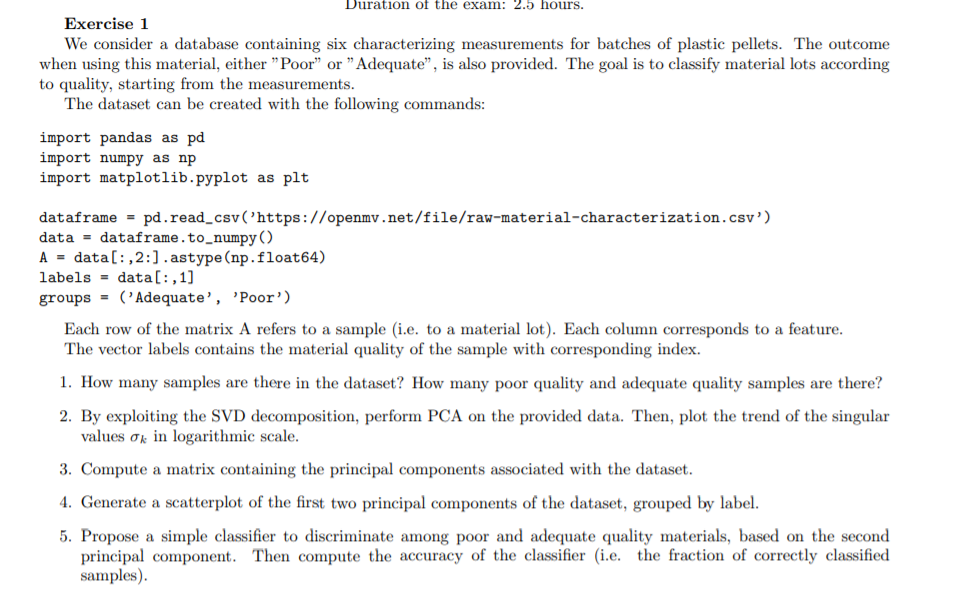

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataframe = pd.read_csv('https://openmv.net/file/raw-material-characterization.csv')
data = dataframe.to_numpy()
A = data[:,2:].astype(np.float64)
labels = data[:,1]
groups = ('Adequate', 'Poor')


In [ ]:
print(np.c_[A,labels])
#we have samples on the rowss and feautres on the columns
#let's transpose A
AT=A.T

[[13.8 9.2 41.2 787.3 18.0 65.0 'Adequate']
 [11.2 5.8 27.6 772.2 17.7 68.8 'Adequate']
 [9.9 5.8 28.3 602.3 18.3 50.7 'Adequate']
 [10.4 4.0 24.7 677.9 17.7 56.5 'Adequate']
 [12.3 9.3 22.0 593.5 19.5 52.0 'Adequate']
 [13.7 7.8 27.0 597.9 18.1 49.8 'Poor']
 [15.5 10.7 34.3 668.5 19.6 55.7 'Poor']
 [15.4 10.7 35.9 602.8 19.2 53.6 'Poor']
 [14.9 11.3 41.0 614.6 18.5 50.0 'Poor']
 [13.7 8.5 28.0 700.4 18.0 57.0 'Adequate']
 [16.1 11.6 39.2 682.8 17.5 56.4 'Poor']
 [12.8 5.4 23.7 739.4 18.2 59.8 'Adequate']
 [10.3 2.5 17.1 595.7 18.4 49.5 'Adequate']
 [12.9 9.7 36.3 642.4 19.1 55.0 'Poor']
 [13.0 7.3 27.0 682.8 19.1 55.3 'Adequate']
 [11.7 5.2 20.2 655.8 19.2 56.3 'Adequate']
 [10.7 6.8 27.7 661.2 18.3 55.5 'Adequate']
 [13.0 5.4 25.3 701.9 19.1 61.0 'Adequate']
 [11.9 7.2 29.8 661.0 18.5 55.4 'Adequate']
 [11.3 7.9 30.0 699.9 18.1 58.1 'Adequate']
 [11.1 4.5 24.8 576.3 19.5 51.6 'Adequate']
 [10.2 5.8 24.7 575.9 18.5 46.2 'Poor']
 [11.4 4.8 26.5 636.0 18.6 58.2 'Adequate']
 [10.7 4.8 26

(6, 24)

In [ ]:
A_mean = np.mean(A, axis=0)
AT_mean = A_mean.T
AT_norm = AT-AT_mean[:,None]
A.shape, AT.shape, A_mean.shape #24samples, 6features


((24, 6), (6, 24), (6,))

#Resolution considering A transpose


*   Features on the rows

*   Samples on the columns




Text(0.5, 1.0, 'explained variance')

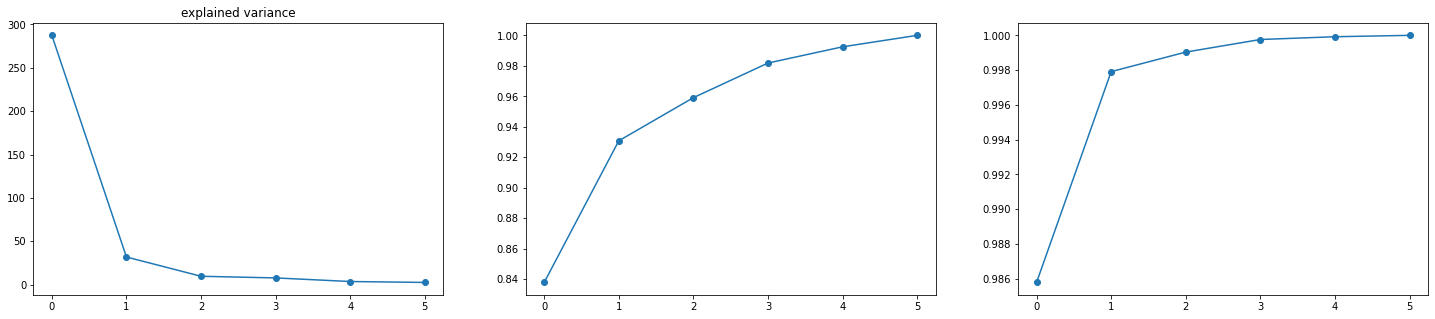

In [ ]:
U,s,VT = np.linalg.svd(AT_norm, full_matrices=False)

fig, axs = plt.subplots(1,3, figsize = (25,5))
axs = axs.flatten()

axs[0].plot(s, '-o')
axs[0].set_title("Singular values")
axs[1].plot(np.cumsum(s)/np.sum(s), '-o')
axs[0].set_title("cumulate fraction")
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), '-o')
axs[0].set_title("explained variance")

In [ ]:
U.shape

(6, 6)

In [ ]:
Phi_AT = U.T @ AT_norm
Phi_AT.shape

(6, 24)

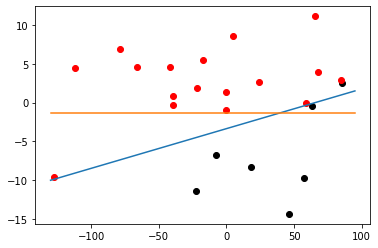

In [ ]:
pc1 = Phi_AT[0,:]
pc2 = Phi_AT[1,:]

plt.scatter(pc1[labels=='Poor'],pc2[labels=='Poor'],label = 'poor', color = 'black')
plt.scatter(pc1[labels=='Adequate'],pc2[labels=='Adequate'],label = 'adequate', color = 'red')
plt.plot([-130,95],[-10, 1.5])
plt.plot([-130,95],[-1.3, -1.3])

In [ ]:
def classifier(pc):
  return np.array(['Poor' if pc[i]<=-1.3 else 'Adequate' for i in range(len(pc))])

y_pred = classifier(pc2)

In [ ]:
TP = np.sum(np.logical_and(y_pred=='Poor', labels=='Poor')) #i have considered poor as positive
TN = np.sum(np.logical_and(y_pred=='Adequate', labels=='Adequate'))
FP = np.sum(np.logical_and(y_pred=='Poor', labels=='Adequate'))
FN = np.sum(np.logical_and(y_pred=='Adequate', labels=='Poor'))

print("Accuracy: %1.3f" % ((TP+TN)/(TP+TN+FP+FN)))

Accuracy: 0.875


#Resolution considering A


*   Samples on the rows
*   Features on the columns



In [ ]:
A_norm = A - A_mean[None,:]

Text(0.5, 1.0, 'explained variance')

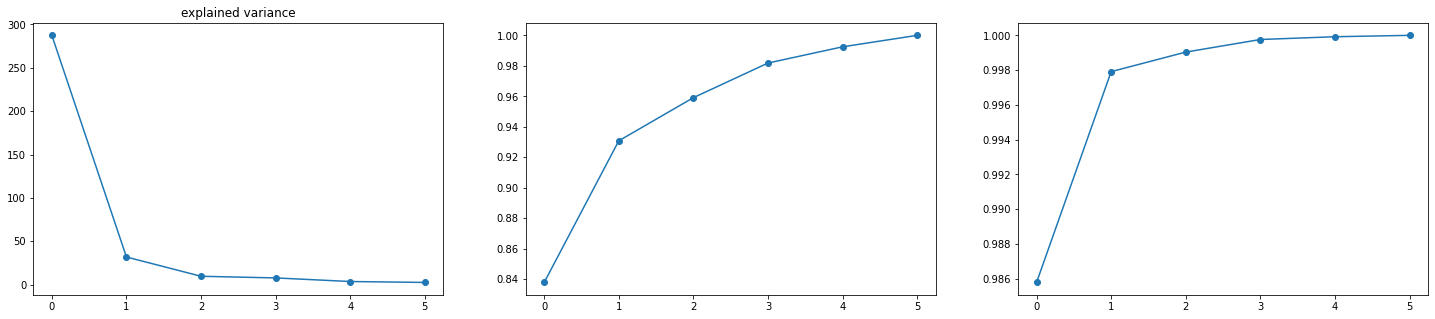

In [ ]:
U,s,VT = np.linalg.svd(A_norm, full_matrices=False)

fig, axs = plt.subplots(1,3, figsize = (25,5))
axs = axs.flatten()

axs[0].plot(s, '-o')
axs[0].set_title("Singular values")
axs[1].plot(np.cumsum(s)/np.sum(s), '-o')
axs[0].set_title("cumulate fraction")
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), '-o')
axs[0].set_title("explained variance")

In [ ]:
A_norm.shape

(24, 6)

In [ ]:
Phi = A_norm @ VT.T
Phi.shape

(24, 6)

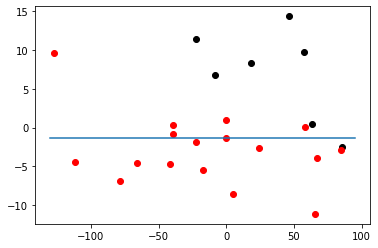

In [ ]:
pc1 = Phi[:,0]
pc2 = Phi[:,1]

plt.scatter(pc1[labels=='Poor'],pc2[labels=='Poor'],label = 'poor', color = 'black')
plt.scatter(pc1[labels=='Adequate'],pc2[labels=='Adequate'],label = 'adequate', color = 'red')
plt.plot([-130,95],[-1.3, -1.3])

#pc2 is of opposite sign wrt to the case in which we have AT..WHY?

In [ ]:
print([np.mean(Phi[:,i] - Phi_AT[i,:]) for i in range(6)])

Phi_AT[1,:],pc2

[4.163336342344337e-17, 1.7763568394002505e-15, -9.43689570931383e-15, 4.7415775010032725e-17, 5.580027181058729e-17, -7.300294628069063e-18]


(array([ -9.53931283,   4.44031201,  -0.0328324 ,   5.52457525,
          3.96876569,  -0.39795433,  -6.78780159,  -9.66518782,
        -14.33154843,   0.79759941, -11.40953351,   6.86876092,
         11.11414702,  -8.32959187,   1.84811276,   8.54254488,
          1.39389665,   4.62733689,  -0.92005532,  -0.32834991,
          2.87695311,   2.52600395,   2.59485265,   4.61830681]),
 array([  9.53931283,  -4.44031201,   0.0328324 ,  -5.52457525,
         -3.96876569,   0.39795433,   6.78780159,   9.66518782,
         14.33154843,  -0.79759941,  11.40953351,  -6.86876092,
        -11.11414702,   8.32959187,  -1.84811276,  -8.54254488,
         -1.39389665,  -4.62733689,   0.92005532,   0.32834991,
         -2.87695311,  -2.52600395,  -2.59485265,  -4.61830681]))

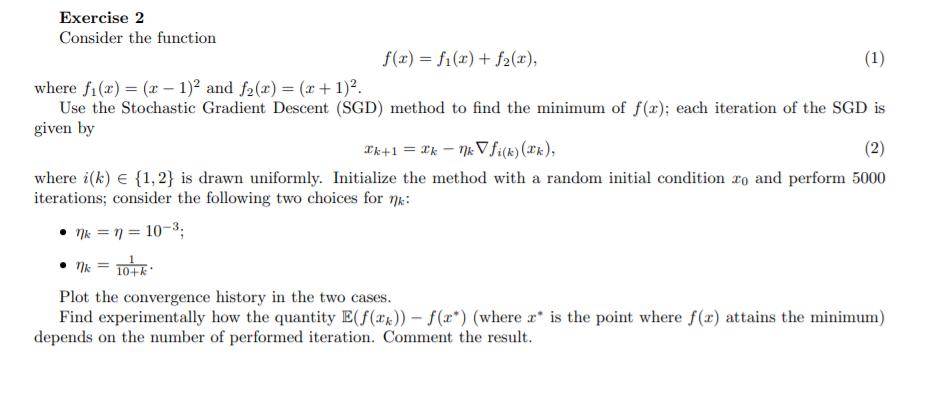

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from tqdm.notebook import tqdm

In [ ]:
f1 = lambda x: (x-1)**2
f2 = lambda x: (x+1)**2
f = lambda x: f1(x)+f2(x)

  0%|          | 0/5000 [00:00<?, ?it/s]

Minimum = 0.02425
Loss = 0.02425


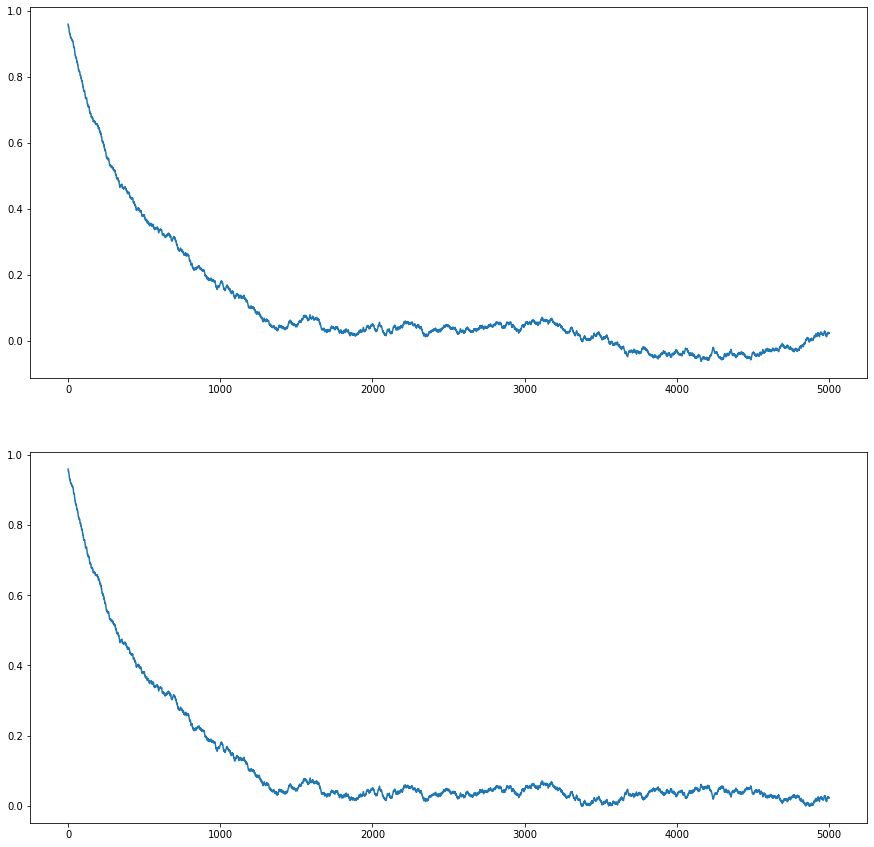

In [ ]:
grad_f = [jax.jit(jax.grad(f1)), jax.jit(jax.grad(f2))]

x0 = np.random.rand(1)[0]

real_min=0
#hyperparameters 
lr=1e-3
num_epochs = 5000
k = [0,1]
np.random.seed(1)
hist = list()
hist_err = list()
def update(x0):
  hist.append(x0)
  hist_err.append(np.linalg.norm(real_min - x0))

update(x0)

for e in tqdm(range(num_epochs)):

  i =np.random.choice(len(k),1)[0]
  x0-=lr*grad_f[i](x0)
  update(x0)

  #incrx = np.linalg.solve(hess_f1(x0),-grad_f1(x0))
  #x0 += incrx

fig, axs = plt.subplots(2,1, figsize=(15,15))
axs[0].plot(hist)
axs[1].plot(hist_err)
print("Minimum = %1.5f" %x0)
print("Loss = %1.5f" %hist_err[-1])

  0%|          | 0/5000 [00:00<?, ?it/s]

Minimum = 0.00292
Loss = 0.00292


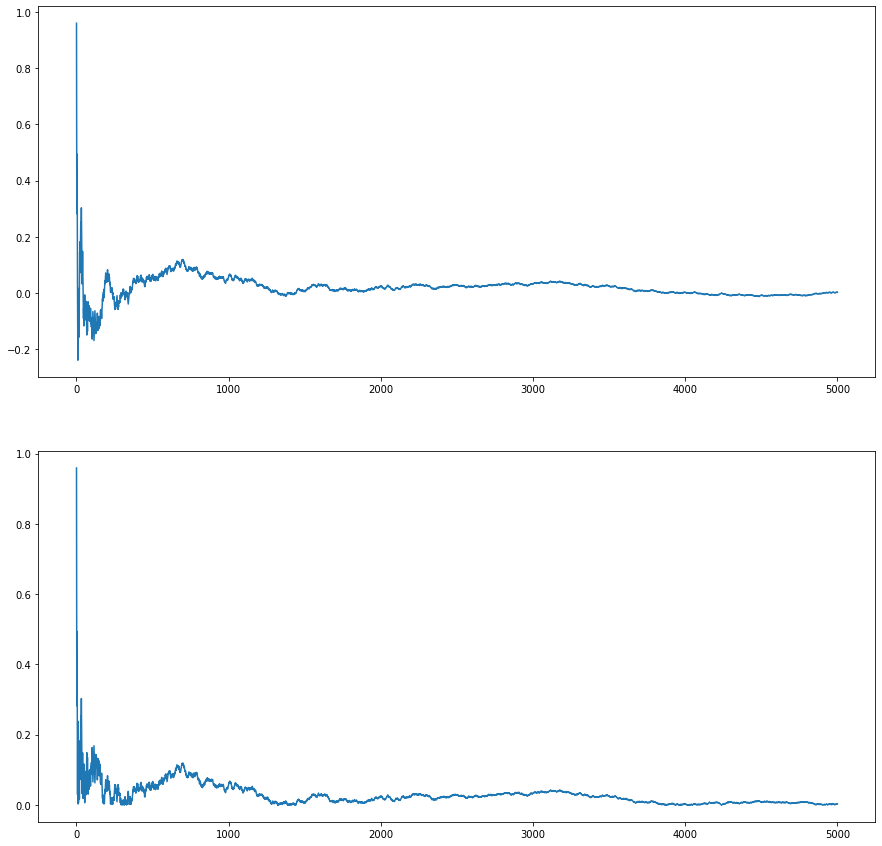

In [ ]:
grad_f = [jax.jit(jax.grad(f1)), jax.jit(jax.grad(f2))]

x0 = np.random.rand(1)[0]

np.random.seed(1)
real_min=0
#hyperparameters 
lr=1e-1
num_epochs = 5000
k = [0,1]

hist = list()
hist_err = list()
def update(x0):
  hist.append(x0)
  hist_err.append(np.linalg.norm(real_min - x0))

update(x0)

for e in tqdm(range(num_epochs)):
  lr = 1/(10+e)
  i =np.random.choice(len(k),1)[0]
  x0-=lr*grad_f[i](x0)
  update(x0)

  #incrx = np.linalg.solve(hess_f1(x0),-grad_f1(x0))
  #x0 += incrx

fig, axs = plt.subplots(2,1, figsize=(15,15))
axs[0].plot(hist)
axs[1].plot(hist_err)
print("Minimum = %1.5f" %x0)
print("Loss = %1.5f" %hist_err[-1])